In [1]:
import tensorflow as tf

# Step 1: Create a random tensor of shape (4, 6)
tensor = tf.random.uniform(shape=(4, 6))
print("Original Tensor:\n", tensor)

# Step 2: Get rank and shape
rank = tf.rank(tensor)
shape = tf.shape(tensor)
print("\nRank of original tensor:", rank.numpy())
print("Shape of original tensor:", shape.numpy())

# Step 3: Reshape into (2, 3, 4) and transpose to (3, 2, 4)
reshaped_tensor = tf.reshape(tensor, (2, 3, 4))
print("\nReshaped Tensor (2, 3, 4):\n", reshaped_tensor)

transposed_tensor = tf.transpose(reshaped_tensor, perm=[1, 0, 2])
print("\nTransposed Tensor (3, 2, 4):\n", transposed_tensor)
print("Shape after transpose:", transposed_tensor.shape)

# Step 4: Broadcast a smaller tensor (1, 4) to match the larger tensor and add
small_tensor = tf.constant([[1.0, 2.0, 3.0, 4.0]])  # Shape (1, 4)
broadcasted_result = transposed_tensor + small_tensor  # Broadcasting happens here
print("\nResult after broadcasting and addition:\n", broadcasted_result)
print("Shape after broadcasting and addition:", broadcasted_result.shape)

# Step 5: Explain broadcasting
print("\nBroadcasting Explanation:")
print("""In TensorFlow, broadcasting automatically expands the dimensions of the smaller tensor
so it can be added to the larger tensor. Here:
- transposed_tensor shape: (3, 2, 4)
- small_tensor shape: (1, 4) → treated as (1, 1, 4)
- It is broadcast across dimensions 0 and 1 to match (3, 2, 4)
""")


Original Tensor:
 tf.Tensor(
[[0.39514172 0.74855673 0.7553358  0.04649496 0.5844345  0.13488686]
 [0.23773539 0.05791748 0.33782768 0.6605997  0.84677005 0.15990257]
 [0.35233867 0.65195274 0.47955477 0.7033341  0.74380064 0.08119154]
 [0.40472567 0.9239321  0.37309515 0.03214657 0.3324505  0.93687654]], shape=(4, 6), dtype=float32)

Rank of original tensor: 2
Shape of original tensor: [4 6]

Reshaped Tensor (2, 3, 4):
 tf.Tensor(
[[[0.39514172 0.74855673 0.7553358  0.04649496]
  [0.5844345  0.13488686 0.23773539 0.05791748]
  [0.33782768 0.6605997  0.84677005 0.15990257]]

 [[0.35233867 0.65195274 0.47955477 0.7033341 ]
  [0.74380064 0.08119154 0.40472567 0.9239321 ]
  [0.37309515 0.03214657 0.3324505  0.93687654]]], shape=(2, 3, 4), dtype=float32)

Transposed Tensor (3, 2, 4):
 tf.Tensor(
[[[0.39514172 0.74855673 0.7553358  0.04649496]
  [0.35233867 0.65195274 0.47955477 0.7033341 ]]

 [[0.5844345  0.13488686 0.23773539 0.05791748]
  [0.74380064 0.08119154 0.40472567 0.9239321 ]]

 

Losses with Prediction 1 (Better):
MSE: 0.02
CCE: 0.22314353

Losses with Prediction 2 (Worse):
MSE: 0.12666667
CCE: 0.6931472


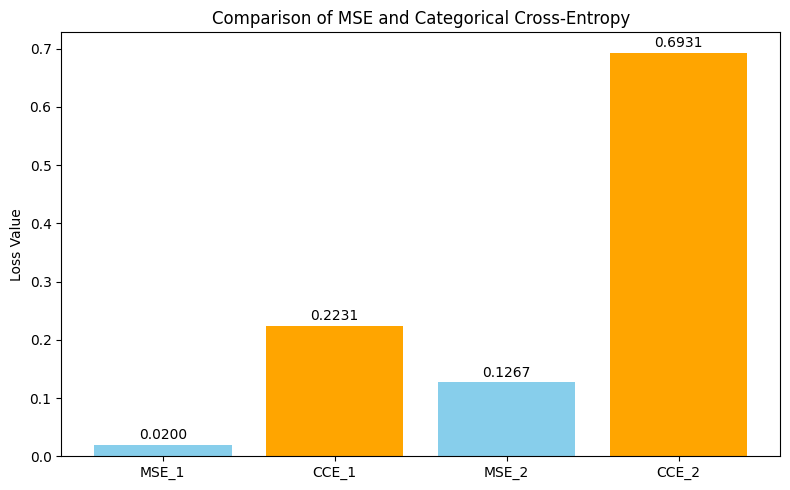

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Define true values (y_true) and predictions (y_pred)
y_true = tf.constant([[0, 1, 0]], dtype=tf.float32)  # One-hot true class
y_pred_1 = tf.constant([[0.1, 0.8, 0.1]], dtype=tf.float32)  # Good prediction
y_pred_2 = tf.constant([[0.2, 0.5, 0.3]], dtype=tf.float32)  # Slightly worse prediction

# Step 2: Compute MSE and CCE losses
mse = tf.keras.losses.MeanSquaredError()
cce = tf.keras.losses.CategoricalCrossentropy()

losses = {
    "MSE_1": mse(y_true, y_pred_1).numpy(),
    "CCE_1": cce(y_true, y_pred_1).numpy(),
    "MSE_2": mse(y_true, y_pred_2).numpy(),
    "CCE_2": cce(y_true, y_pred_2).numpy()
}

# Print loss values
print("Losses with Prediction 1 (Better):")
print("MSE:", losses["MSE_1"])
print("CCE:", losses["CCE_1"])

print("\nLosses with Prediction 2 (Worse):")
print("MSE:", losses["MSE_2"])
print("CCE:", losses["CCE_2"])

# Step 4: Plotting the loss values
labels = ['MSE_1', 'CCE_1', 'MSE_2', 'CCE_2']
values = [losses[k] for k in labels]

plt.figure(figsize=(8, 5))
bars = plt.bar(labels, values, color=['skyblue', 'orange', 'skyblue', 'orange'])
plt.title("Comparison of MSE and Categorical Cross-Entropy")
plt.ylabel("Loss Value")

# Annotate bars with values
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.005, f"{yval:.4f}", ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models
import datetime

# Step 1: Load and preprocess the MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_val, y_val) = mnist.load_data()

# Normalize pixel values to [0, 1] and reshape
x_train = x_train / 255.0
x_val = x_val / 255.0

# Step 2: Build a simple neural network model
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Step 3: Setup TensorBoard logging
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

# Train the model
model.fit(x_train, y_train,
          epochs=5,
          validation_data=(x_val, y_val),
          callbacks=[tensorboard_callback])


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.8761 - loss: 0.4424 - val_accuracy: 0.9593 - val_loss: 0.1350
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9650 - loss: 0.1184 - val_accuracy: 0.9720 - val_loss: 0.0944
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - accuracy: 0.9776 - loss: 0.0746 - val_accuracy: 0.9731 - val_loss: 0.0859
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9833 - loss: 0.0559 - val_accuracy: 0.9756 - val_loss: 0.0788
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9870 - loss: 0.0419 - val_accuracy: 0.9770 - val_loss: 0.0739


In [ ]:
from google.colab import drive
drive.mount('/content/drive')